# Nom : DIATTA
# Prénoms : Amadou Bâ
# IA SCHOOL MASTER 2 DATA SCIENCE (M2B)

## SCHEMA RELATIONNEL

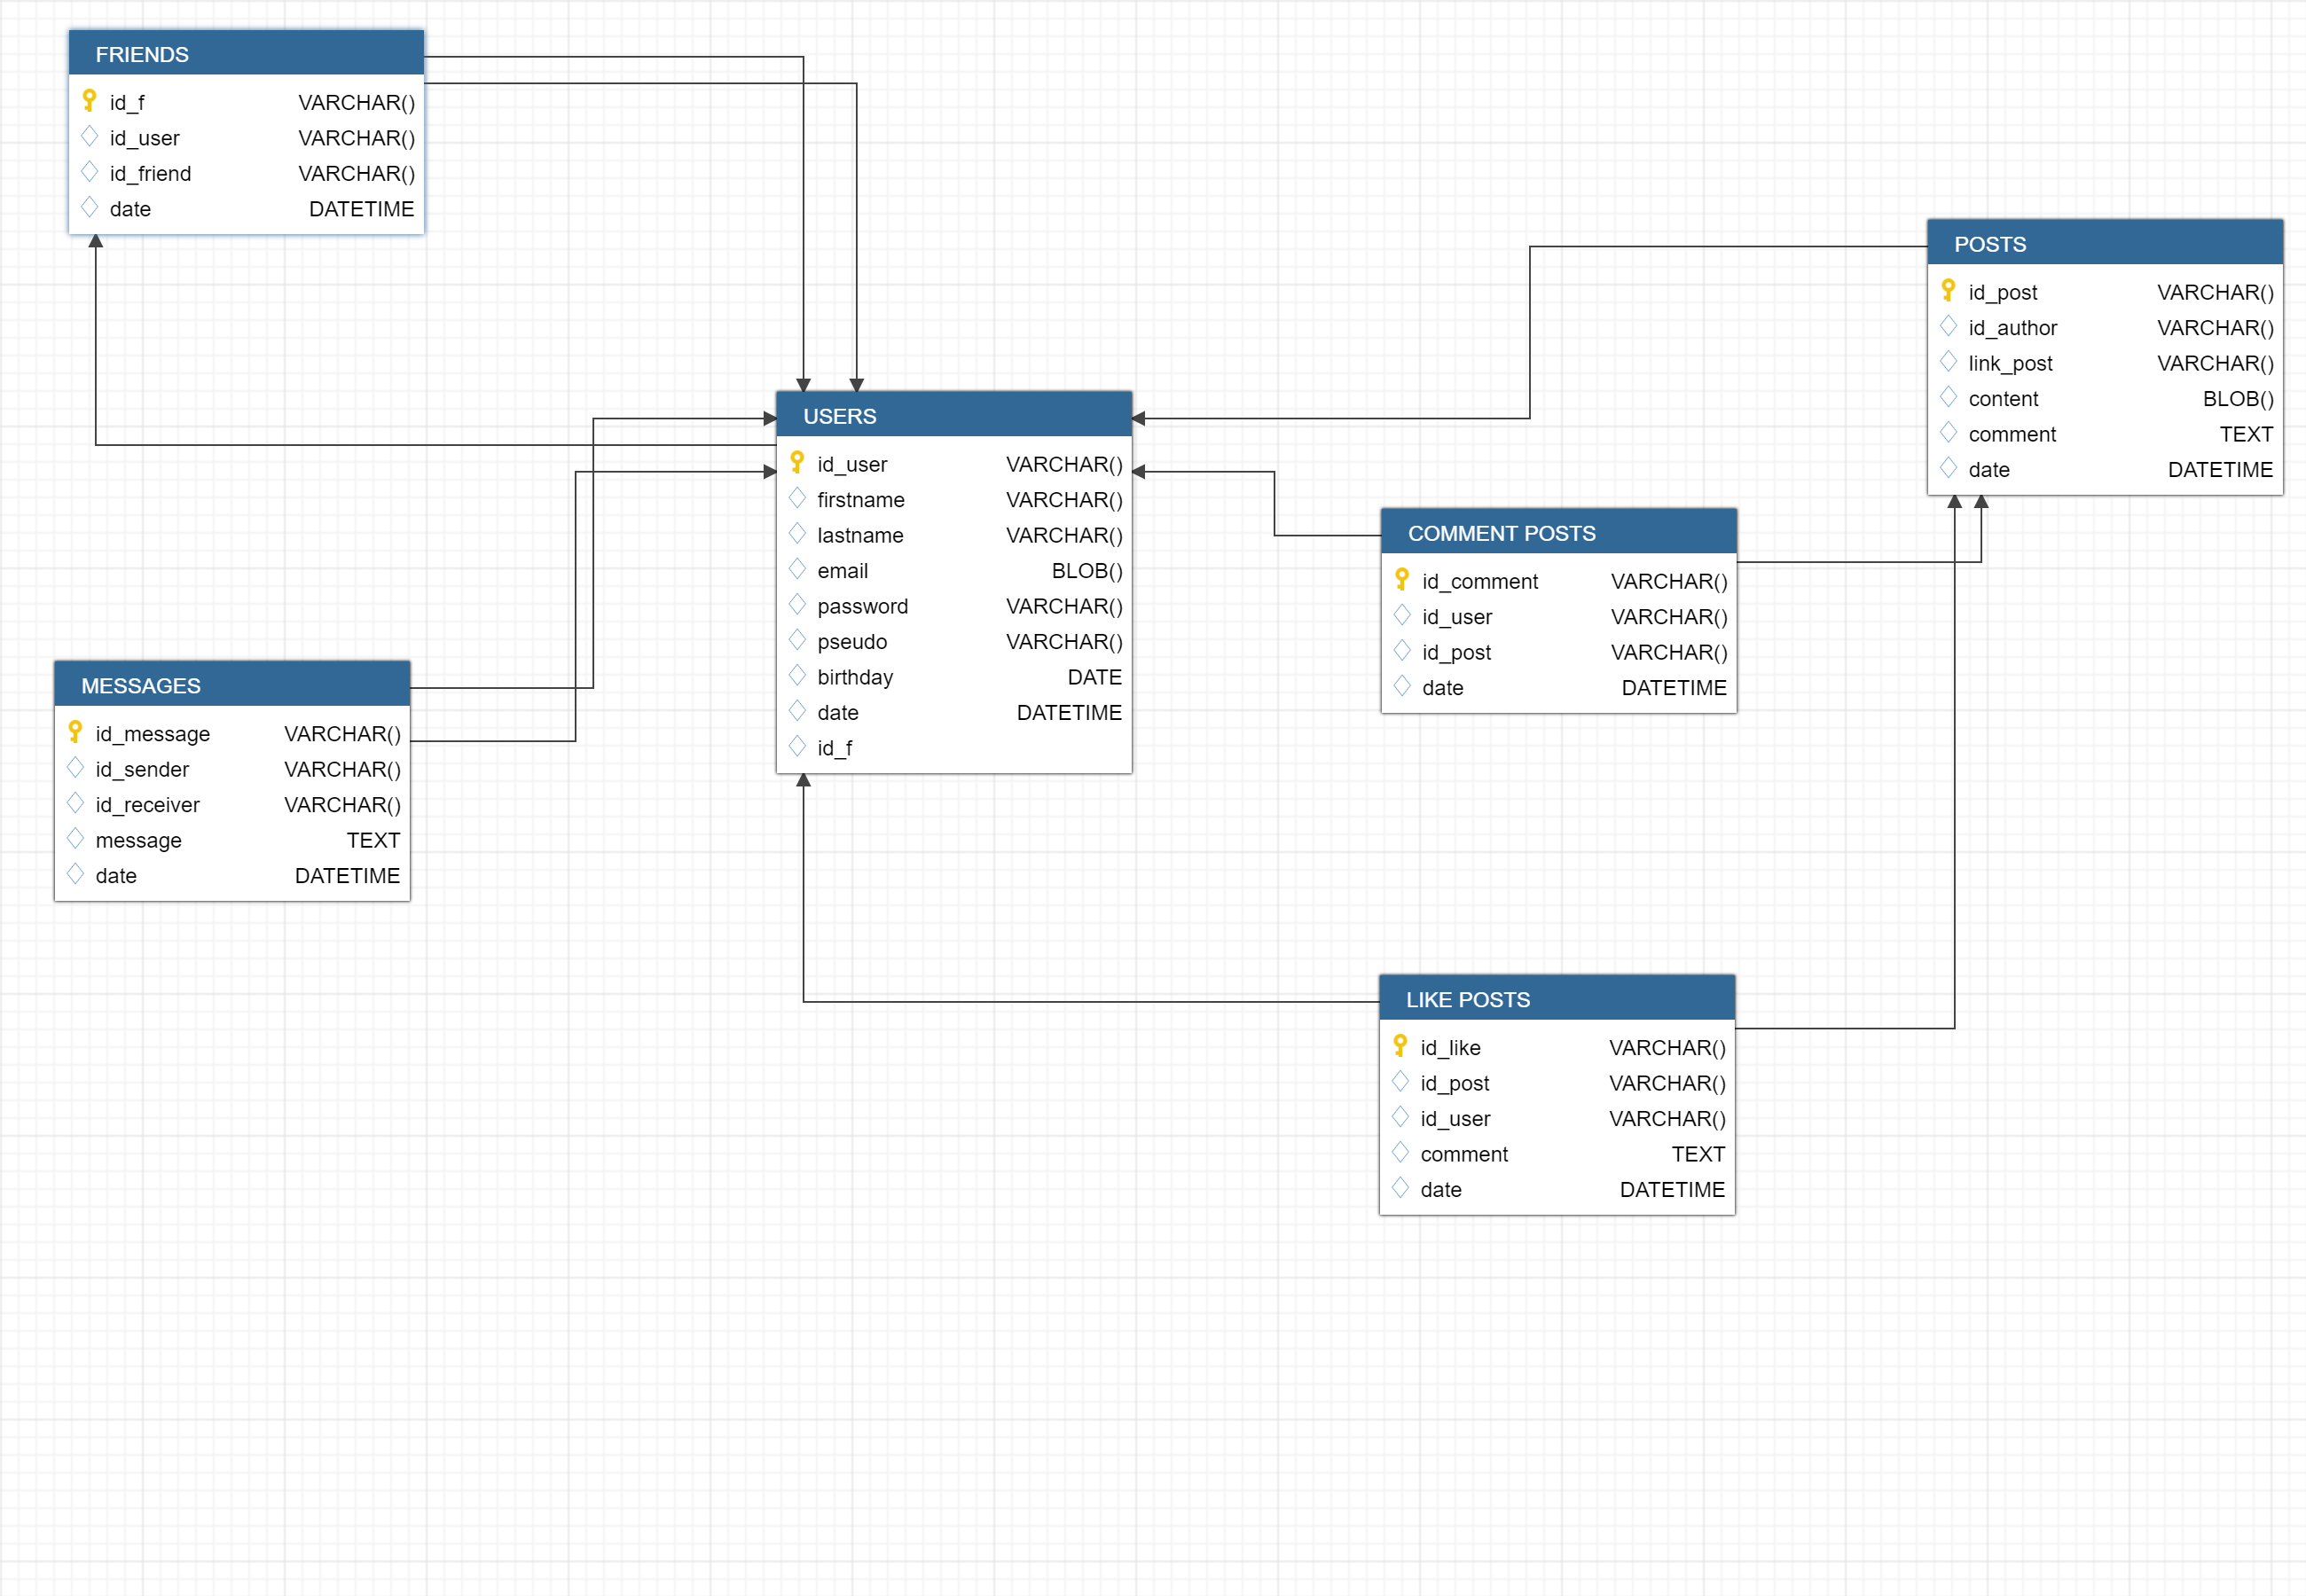

In [22]:
chemin = "C:/Users/amado/oneDrive/Documents/IA_School/MongoDB/projetReseauSocial/"
Image(filename=chemin  + "projetReseauSocial.png", width=1000, height=1000)

## IMPORTER LES BIBLIOTHEQUES

In [1]:
import pymongo
import datetime
import uuid #Bibliotheque qui va permettre de générer des id uniques

## CREER LA BDD 'SOCIALNET'

In [2]:
#La BDD est créée que lorsqu'on décide de créer une collection.De même la collection est créée que lorsqu'on y mets du contenu 
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["socialnet"]
col_users = mydb["users"] #Collection des Utilisateurs
col_msg = mydb["messages"] #Collection Messages
col_posts = mydb["posts"] #Collection Publications

## FONCTION POUR CREER LES UTILISATEURS

In [3]:
def createUser(firstname, lastname, email, password, pseudo, birthday):
    user = {"_id": uuid.uuid4().hex, "firstname": firstname, "lastname": lastname, "email": email, "password": password, "pseudo" : pseudo, "birthday": birthday, "friends" : []}
    col_users.insert_one(user)
    print(pseudo+" a été créé")

## FONCTION POUR CREER LES AMITIES

In [4]:
def addFriend(id_user, id_friend):
    user = col_users.find_one({"_id": id_user})
    user['friends'].append(id_friend)
    col_users.update_one({"_id": id_user},{ "$set": { "friends": user['friends'] } })
    
    friend = col_users.find_one({"_id": id_friend})
    friend["friends"].append(id_user)
    col_users.update_one({"_id": id_friend},{ "$set": { "friends": friend['friends']} })
    print(user['pseudo']+" est devenu ami avec "+friend['pseudo'])

## FONCTION POUR ENVOYER DES MESSAGES PRIVES

In [5]:
def sendMessage(id_sender, id_receiver, message):
    data = {"_id": uuid.uuid4().hex, "id_sender": id_sender, "id_receiver": id_receiver, "message": message, "date": datetime.datetime.now()}
    col_msg.insert_one(data)

## FONCTION POUR PUBLIER DES POSTS

In [6]:
def createPost(id_author, link_imageArray, content):
    data = {"_id": uuid.uuid4().hex, "id_author": id_author, "images": link_imageArray, "content": content, "likes": [] , "comment": [],"date": datetime.datetime.now()}
    col_posts.insert_one(data)

## FONCTION POUR LES LIKES

In [7]:
def likePost(id_user, id_post):
    post = col_posts.find_one({"_id": id_post})
    post['likes'].append(id_user)
    col_posts.update_one({"_id": id_post},{ "$set": { "likes": post['likes'] } })

## FONCTION POUR LES COMMENTAIRES

In [8]:
def commentPost(id_user, id_post, comment):
    post = col_posts.find_one({"_id": id_post})
    data = { "id_user": id_user, "comment": comment, "date": datetime.datetime.now()}
    post['comment'].append(data)
    col_posts.update_one({"_id": id_post},{ "$set": { "comment": post['comment'] } })

## REMPLIR LA BDD 'SOCIALNET'

In [9]:
######### ----Code de creation automatique d'utilisateur et de remplissage de la base de données de Mongo DB----- ########

firstname = ["Alexandre", "Amadou","Xavier", "Mélanie", "Isabelle", "Michelle", "Aziz", "Fatou"]
lastname = ["Diatta", "Beaudelaire", "Alawi", "Diaby", "Mendez", "Smith", "Curie", "Einstein"]
birthday = ["2000-10-10", "1992-02-27", "1960-04-04", "1975-09-07", "2002-03-08", "1999-12-31"]

In [10]:
# Code generant 6 utilisateurs et les insère dans mongodb
for i in range(6):
    fname = firstname[i]
    lname = lastname[i]
    email = fname.lower()+"."+lname.lower()+"@mail.net"
    pseudo = fname[:3]+lname[:3]
    pwd = "alibaba123"
    bday = birthday[i]
    createUser(fname, lname, email, pwd, pseudo, bday) 

AleDia a été créé
AmaBea a été créé
XavAla a été créé
MélDia a été créé
IsaMen a été créé
MicSmi a été créé


## INTERACTIONS ENTRE UTILISATEURS

In [11]:
# Simulation d'une discussion entre deux utilisateurs
list_user = col_users.find() #tableau des users
userA = list_user[2]
userB = list_user[5]

sendMessage(userA['_id'], userB['_id'], "Bonjour comment vas-tu ?")
sendMessage( userB['_id'],userA['_id'], "Bonjour, je vais bien.")
sendMessage(userA['_id'], userB['_id'], "Peux-tu me prendre des ramens ce soir en revenant du boulot?")
sendMessage( userB['_id'],userA['_id'], "Ok pas de problème.") 

In [12]:
# Simulations pour créer des liens d'amitié entre les utilisateurs
list_user = col_users.find() 
addFriend(list_user[0]['_id'], list_user[1]['_id'])
addFriend(list_user[0]['_id'], list_user[2]['_id'])
addFriend(list_user[0]['_id'], list_user[3]['_id'])
addFriend(list_user[2]['_id'], list_user[1]['_id'])
addFriend(list_user[4]['_id'], list_user[3]['_id'])
addFriend(list_user[5]['_id'], list_user[1]['_id'])

AleDia est devenu ami avec AmaBea
AleDia est devenu ami avec XavAla
AleDia est devenu ami avec MélDia
XavAla est devenu ami avec AmaBea
IsaMen est devenu ami avec MélDia
MicSmi est devenu ami avec AmaBea


In [13]:
# Simulations d'une publication commentée et likée 
list_user = col_users.find()
createPost(list_user[0]['_id'],["https://image.freepik.com/photos-gratuite/rider-moto-route-cheval-s-amuser-au-volant-route-vide_1150-10701.jpg"], "En route pour tester ma nouvelle moto!!")
post = col_posts.find_one()
likePost(list_user[1]['_id'],post['_id'])
commentPost(list_user[3]['_id'],post['_id'], "Superbe moto! Elle Dechire grave")
likePost(list_user[5]['_id'],post['_id'])
likePost(list_user[2]['_id'],post['_id'])
commentPost(list_user[2]['_id'],post['_id'], "Cool!! @"+list_user[0]['pseudo']+" J'espère que tu nous fera un retour.")
commentPost(list_user[0]['_id'],post['_id'], "pas de problème @"+list_user[2]['pseudo']) 